In [1]:
%load_ext autotime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

%matplotlib inline

time: 1.28 s (started: 2022-10-05 14:30:19 +08:00)


In [2]:
x = pickle.load(open('./data/fundamentals.pkl', 'rb'))
y = pickle.load(open('./data/performance.pkl', 'rb'))

time: 32 ms (started: 2022-10-05 14:30:20 +08:00)


In [3]:
x.head()

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,2016-10-31,45846,USD,2016,Q4,2016-12-20,2018-12-20,324000000.0,328000000.0,...,234000000.0,-52000000.0,0.0,-26000000.0,-78000000.0,-38000000.0,27000000.0,-43000000.0,-56000000.0,90000000
1,A,2017-01-31,45846,USD,2017,Q1,2017-03-08,2018-03-06,322000000.0,326000000.0,...,116000000.0,-32000000.0,NaN,-69000000.0,-101000000.0,-42000000.0,89000000.0,-93000000.0,-58000000.0,-48000000
2,A,2017-04-30,45846,USD,2017,Q2,2017-06-06,2018-05-31,321000000.0,325000000.0,...,257000000.0,-43000000.0,NaN,0.0,-43000000.0,-43000000.0,52000000.0,-75000000.0,-67000000.0,148000000
3,A,2017-07-31,45846,USD,2017,Q3,2017-09-06,2018-08-30,321000000.0,326000000.0,...,228000000.0,-43000000.0,NaN,-57000000.0,-101000000.0,-42000000.0,39000000.0,32000000.0,29000000.0,174000000
4,A,2017-10-31,45846,USD,2017,Q4,2017-12-21,2018-12-20,324000000.0,327000000.0,...,288000000.0,-58000000.0,0.0,0.0,-60000000.0,-43000000.0,-70000000.0,8000000.0,-106000000.0,115000000


time: 16 ms (started: 2022-10-05 14:30:20 +08:00)


In [4]:
y.head()

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
0,A,2016-10-31,43.33,1556762.0,2017-10-31,67.74,1609938.0
1,A,2017-01-31,48.04,2552612.0,2018-01-31,73.77,1949108.0
2,A,2017-04-30,55.50,1897018.0,2018-04-30,66.49,2277705.0
3,A,2017-07-31,60.32,1038744.0,2018-07-31,64.93,2539265.0
4,A,2017-10-31,67.74,1609938.0,2018-10-31,64.35,3820987.0


time: 16 ms (started: 2022-10-05 14:30:20 +08:00)


In [5]:
print(x.shape)
print(y.shape)

(36685, 74)
(36685, 7)
time: 0 ns (started: 2022-10-05 14:30:20 +08:00)


# EDA and Data Cleaning

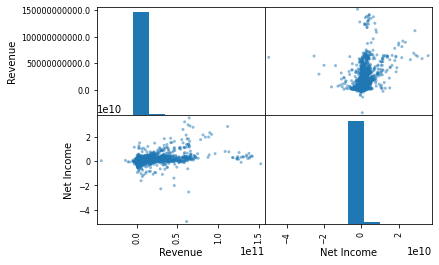

time: 469 ms (started: 2022-10-05 14:30:20 +08:00)


In [6]:
# plotting a scatter of revenue vs net income (which should show a positive correlation)
from pandas.plotting import scatter_matrix
attributes=["Revenue","Net Income"]
scatter_matrix(x[attributes]);

In [7]:
# Finding out if there are stocks that trade less than 10,000 shares a day
y.query("Volume1 < 1e4 or Volume2 < 1e4")

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
214,ABCD,2016-12-31,5.00,9679.0,2017-12-31,5.60,117353.0
216,ABCD,2017-06-30,5.02,9448.0,2018-06-30,11.11,198860.0
225,ABIO,2016-09-30,51.48,474.0,2017-09-30,19.80,4107.0
226,ABIO,2016-12-31,52.20,2240.0,2017-12-31,25.20,1790.0
227,ABIO,2017-03-31,45.00,2840.0,2018-03-31,8.99,39143.0
...,...,...,...,...,...,...,...
36467,ZDGE,2018-10-31,1.92,1706.0,2019-10-31,1.91,24656.0
36468,ZDGE,2019-01-31,1.88,12331.0,2020-01-31,1.70,592.0
36470,ZDGE,2019-07-31,1.86,8814.0,2020-07-30,1.43,19142.0
36472,ZDGE,2020-01-31,1.70,592.0,2021-01-30,7.45,276914.0


time: 15 ms (started: 2022-10-05 14:30:21 +08:00)


In [8]:
# In X, there are some stocks with no shares outstanding
x[x["Shares (Diluted)_x"].isnull()]

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
1021,AGI,2016-09-30,111482,USD,2016,Q3,2016-10-27,2016-10-27,NaN,NaN,...,3.080000e+07,NaN,NaN,NaN,-1.140000e+07,NaN,-1.800000e+06,NaN,-1.900000e+06,17300000
1022,AGI,2016-12-31,111482,USD,2016,Q4,2017-03-31,2017-03-31,NaN,NaN,...,-1.210000e+07,NaN,NaN,NaN,-9.700000e+06,NaN,-2.000000e+06,NaN,-2.200000e+06,-25400000
1023,AGI,2017-03-31,111482,USD,2017,Q1,2017-05-12,2017-05-12,NaN,NaN,...,9.500000e+06,NaN,NaN,NaN,-1.050000e+07,NaN,-1.900000e+06,NaN,-1.900000e+06,-2600000
1731,ALTMS,2019-03-31,806793,USD,2019,Q1,2019-06-13,2019-06-13,NaN,NaN,...,2.993500e+07,-133077000.0,NaN,NaN,-1.330770e+08,NaN,1.170000e+08,NaN,1.170000e+08,13858000
1732,ALTMS,2019-06-30,806793,USD,2019,Q2,2019-08-28,2019-08-28,NaN,NaN,...,3.188300e+07,-47061000.0,NaN,NaN,-4.706100e+07,NaN,6.650000e+07,NaN,6.650000e+07,51322000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32015,TM-28,2020-06-30,1016068,USD,2020,Q1,2020-08-07,2021-08-05,NaN,NaN,...,2.117000e+09,NaN,-186000000.0,-1.124200e+10,1.359000e+09,NaN,8.687000e+09,NaN,8.687000e+09,12163000000
32016,TM-28,2020-09-30,1016068,USD,2020,Q2,2020-11-06,2021-08-05,NaN,NaN,...,2.063000e+09,NaN,-127000000.0,-1.470100e+10,-4.031000e+09,NaN,-4.662000e+09,NaN,-4.686000e+09,-6654000000
32017,TM-28,2020-12-31,1016068,USD,2020,Q3,2021-02-10,2021-11-04,NaN,NaN,...,2.053000e+09,NaN,-228000000.0,-1.499800e+10,-6.431000e+09,NaN,2.401000e+09,NaN,2.408000e+09,-1970000000
32018,TM-28,2021-03-31,1016068,USD,2020,Q4,2021-06-03,2022-02-09,NaN,NaN,...,1.000000e+07,NaN,-320000000.0,-1.453900e+10,-2.388000e+09,-700000000.0,1.158000e+09,NaN,4.620000e+08,-1916000000


time: 31 ms (started: 2022-10-05 14:30:21 +08:00)


In [9]:
# Create a few filters to get rid of unwanted rows
# Filter out rows with no share price
filter1 = y['Open1'].notnull()

# Filter out shares with low/no volume (less than 10k traded)
filter2 = (y['Volume1']>1e4) | (y['Volume2']>1e4)

# Filter out rows with missing dates
filter3 = y['Date2'].notnull()

# Filter out rows with no outstanding shares
filter4 = x["Shares (Diluted)_x"].notnull()

time: 0 ns (started: 2022-10-05 14:30:21 +08:00)


In [10]:
# Apply above 3 filters to y dataframe
y = y[filter1 & filter2 & filter3 & filter4].reset_index(drop=True)
y

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
0,A,2016-10-31,43.33,1556762.0,2017-10-31,67.74,1609938.0
1,A,2017-01-31,48.04,2552612.0,2018-01-31,73.77,1949108.0
2,A,2017-04-30,55.50,1897018.0,2018-04-30,66.49,2277705.0
3,A,2017-07-31,60.32,1038744.0,2018-07-31,64.93,2539265.0
4,A,2017-10-31,67.74,1609938.0,2018-10-31,64.35,3820987.0
...,...,...,...,...,...,...,...
34497,ZYXI,2020-06-30,20.95,1160230.0,2021-06-30,14.13,144577.0
34498,ZYXI,2020-09-30,15.55,1115434.0,2021-09-30,NaN,NaN
34499,ZYXI,2020-12-31,12.71,318435.0,2021-12-31,NaN,NaN
34500,ZYXI,2021-03-31,13.60,423240.0,2022-03-31,NaN,NaN


time: 16 ms (started: 2022-10-05 14:30:21 +08:00)


In [11]:
# Apply all 4 filters to x dataframe
X = x[filter1 & filter2 & filter3 & filter4].reset_index(drop=True)

time: 15 ms (started: 2022-10-05 14:30:21 +08:00)


In [12]:
X

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
0,A,2016-10-31,45846,USD,2016,Q4,2016-12-20,2018-12-20,324000000.0,328000000.0,...,234000000.0,-52000000.0,0.0,-26000000.0,-78000000.0,-38000000.0,27000000.0,-43000000.0,-56000000.0,90000000
1,A,2017-01-31,45846,USD,2017,Q1,2017-03-08,2018-03-06,322000000.0,326000000.0,...,116000000.0,-32000000.0,NaN,-69000000.0,-101000000.0,-42000000.0,89000000.0,-93000000.0,-58000000.0,-48000000
2,A,2017-04-30,45846,USD,2017,Q2,2017-06-06,2018-05-31,321000000.0,325000000.0,...,257000000.0,-43000000.0,NaN,0.0,-43000000.0,-43000000.0,52000000.0,-75000000.0,-67000000.0,148000000
3,A,2017-07-31,45846,USD,2017,Q3,2017-09-06,2018-08-30,321000000.0,326000000.0,...,228000000.0,-43000000.0,NaN,-57000000.0,-101000000.0,-42000000.0,39000000.0,32000000.0,29000000.0,174000000
4,A,2017-10-31,45846,USD,2017,Q4,2017-12-21,2018-12-20,324000000.0,327000000.0,...,288000000.0,-58000000.0,0.0,0.0,-60000000.0,-43000000.0,-70000000.0,8000000.0,-106000000.0,115000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34497,ZYXI,2020-06-30,171401,USD,2020,Q2,2020-07-28,2021-04-29,36611300.0,37899400.0,...,2651000.0,-357000.0,NaN,NaN,-357000.0,NaN,-16000.0,53000.0,37000.0,2331000
34498,ZYXI,2020-09-30,171401,USD,2020,Q3,2020-10-27,2021-07-29,37945600.0,39035700.0,...,-769000.0,-105000.0,NaN,NaN,-105000.0,NaN,-15000.0,25202000.0,25187000.0,24313000
34499,ZYXI,2020-12-31,171401,USD,2020,Q4,2021-02-25,2021-11-02,38262400.0,39189700.0,...,-1696000.0,-226000.0,NaN,NaN,-226000.0,NaN,-15000.0,293000.0,-134000.0,-2056000
34500,ZYXI,2021-03-31,171401,USD,2021,Q1,2021-04-29,2022-04-28,38320700.0,38320700.0,...,-5305000.0,-299000.0,NaN,NaN,-299000.0,NaN,-23000.0,-48000.0,-130000.0,-5734000


time: 47 ms (started: 2022-10-05 14:30:21 +08:00)


In [13]:
y.head()

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
0,A,2016-10-31,43.33,1556762.0,2017-10-31,67.74,1609938.0
1,A,2017-01-31,48.04,2552612.0,2018-01-31,73.77,1949108.0
2,A,2017-04-30,55.50,1897018.0,2018-04-30,66.49,2277705.0
3,A,2017-07-31,60.32,1038744.0,2018-07-31,64.93,2539265.0
4,A,2017-10-31,67.74,1609938.0,2018-10-31,64.35,3820987.0


time: 0 ns (started: 2022-10-05 14:30:21 +08:00)


In [14]:
pickle.dump(X, open('./data/fundamentals2.pkl', 'wb'))
pickle.dump(y, open('./data/performance2.pkl', 'wb'))

time: 16 ms (started: 2022-10-05 14:30:21 +08:00)


In [15]:
# save the final file to csv
X.to_csv("./data/StocksFundamentals2.csv")
y.to_csv("./data/StockPerformanceAnnual2.csv")

time: 2.39 s (started: 2022-10-05 14:30:21 +08:00)
